In [67]:
# import
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%
library(ggplot2)
library(stargazer)
library(labelVector)

## Create data

In [18]:
# Create data
N = 100
a_true = 10.
b_true = 2.
sigma = 1.

x <- runif(n = N, min = 1, max = 10)
eps <- rnorm(n = N, mean = 0, sd = sigma)

y <- a_true + b_true*x + eps

In [68]:
x <- set_label(x, "x")
y <- set_label(y, "y")

In [71]:
get_label(y)

[1] "y"

In [69]:
head(c(y,x))

15.32106 14.68855 28.11447 21.49313 13.61104 15.11893

In [70]:
mydata <- c(y, x)
stargazer(y, x, type = "text", title="Descriptive statistics")

ERROR: Error: $ operator is invalid for atomic vectors


## Estimate model

In [44]:
model <- lm(y ~ x)
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89995 -0.64809 -0.08014  0.63758  2.42988 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.84696    0.20298   48.51   <2e-16 ***
x            2.02008    0.03663   55.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9269 on 98 degrees of freedom
Multiple R-squared:  0.9688,	Adjusted R-squared:  0.9685 
F-statistic:  3041 on 1 and 98 DF,  p-value: < 2.2e-16


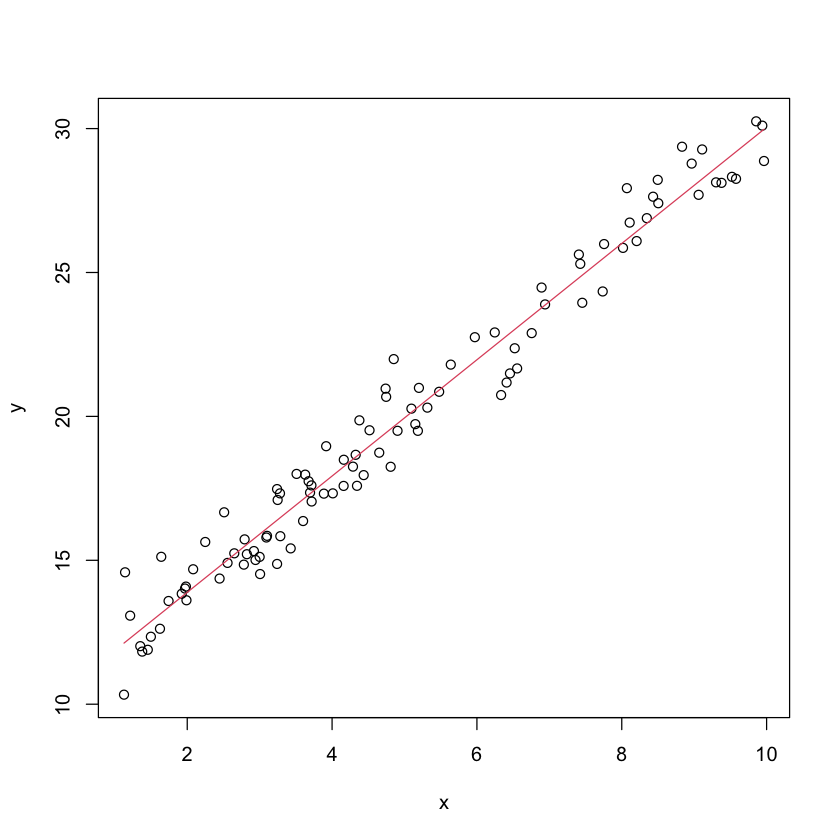

In [42]:
# Plot actual data
plot(x, y)

# Plot regression model
x0 <- seq(min(x), max(x), length = 20)  ## prediction grid
y0 <- predict.lm(model, newdata = list(x = x0))  ## predicted values
lines(x0, y0, col = 2)  ## add regression curve (colour: red)

In [54]:
stargazer(model, type = "text",  #we use html output to match our planned R Markdown output
     title = "OLS")


OLS
                        Dependent variable:    
                    ---------------------------
                                 y             
-----------------------------------------------
x                            2.020***          
                              (0.037)          
                                               
Constant                     9.847***          
                              (0.203)          
                                               
-----------------------------------------------
Observations                    100            
R2                             0.969           
Adjusted R2                    0.968           
Residual Std. Error       0.927 (df = 98)      
F Statistic          3,041.420*** (df = 1; 98) 
Note:               *p<0.1; **p<0.05; ***p<0.01
